In [2]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader
!pip install finance-datareader

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/14/03/3c854ca3e02eedf614abba4b2e177c469bf3af58207fa30d5098c5d652fe/yfinance-0.2.37-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.35
    Uninstalling yfinance-0.2.35:
      Successfully uninstalled yfinance-0.2.35
  Obtaining dependency information for finance-datareader from https://files.pythonhosted.org/packages/e3/15/724a966c42658a7640813f94650d2f18e24e78ac353765762da82b86fb96/finance_datareader-0.9.90-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 952.2 kB/s eta 0:00:000:00:01


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import yfinance as yf
from pandas_datareader import data as pdr
import FinanceDataReader as fdr


import warnings
warnings.filterwarnings('ignore')

In [12]:
def create_dataframe(start = '2009-07-01', end = '2020-12-31'):
    df = fdr.DataReader('^GSPC', start = start, end = end)[['Adj Close']]
    df.columns = ['S&P 500']
    indexes = {'FRED:M2SL':'M2', 'FRED:DGS10': '10_year_treasury', 'FRED:DTB3': '3_months_treasury','FRED:CSUSHPINSA': 'Shiller_index', 'FRED:FEDFUNDS': 'Fed_fund_effective_rate', 'FRED:UNRATE': 'Unemployment', 'FRED:DSPIC96': 'Disposable_income', 'FRED:GDP': 'GDP', 'FRED:CPIAUCSL': 'CPI', 'FRED:INDPRO': 'Industrial_production', 'FRED:TOTCI': 'Commercial_loans', 'FRED:GPDI': 'Private_investment'}
    tickers = {'GC=F': 'Gold', 'HG=F': 'Copper', 'DX=F': 'US_dollar', 'CL=F': 'Crude_oil', 'VIX': 'VIX', 'ZW=F': 'Wheat'}

    for tkrs, name in tickers.items():
      dataframe = fdr.DataReader(tkrs, start = start, end = end)[['Adj Close']]
      dataframe.columns = [name]
      df= df.join(dataframe)
    for indx, name in indexes.items():
      dataframe = fdr.DataReader(indx, start = start, end = end)
      dataframe.columns = [name]
      df = df.join(dataframe)

    df.fillna(method = 'ffill', inplace = True)
    df.fillna(0, inplace = True)
    df = df['2010-01-01':]
    return df

In [13]:
df = create_dataframe()

In [14]:
df

,S&P 500,Gold,Copper,US_dollar,Crude_oil,VIX,Wheat,M2,10_year_treasury,3_months_treasury,Shiller_index,Fed_fund_effective_rate,Unemployment,Disposable_income,GDP,CPI,Industrial_production,Commercial_loans,Private_investment
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,1132.989990,1117.699951,3.3880,77.830002,81.510002,20.040001,557.75,8496.0,3.85,0.08,146.664,0.12,9.9,12280.2,14651.249,217.347,88.2468,1256.7334,1998.710
2010-01-05,1136.520020,1118.099976,3.3960,77.849998,81.769997,19.350000,553.00,8496.0,3.77,0.07,146.664,0.12,9.9,12280.2,14651.249,217.347,88.2468,1256.7334,1998.710
2010-01-06,1137.140015,1135.900024,3.4775,77.654999,83.180000,19.160000,567.25,8496.0,3.85,0.06,146.664,0.12,9.9,12280.2,14651.249,217.347,88.2468,1246.4010,1998.710
2010-01-07,1141.689941,1133.099976,3.4115,78.105003,82.660004,19.059999,557.75,8496.0,3.85,0.05,146.664,0.12,9.9,12280.2,14651.249,217.347,88.2468,1246.4010,1998.710
2010-01-08,1144.979980,1138.199951,3.3880,77.654999,82.750000,18.129999,568.50,8496.0,3.83,0.05,146.664,0.12,9.9,12280.2,14651.249,217.347,88.2468,1246.4010,1998.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,3690.010010,1874.699951,3.5520,90.339996,48.119999,23.309999,629.75,19114.6,0.96,0.09,234.381,0.09,6.7,16406.1,22024.502,262.005,97.9754,2581.4309,4040.153
2020-12-24,3703.060059,1879.900024,3.5600,90.250000,48.230000,21.530001,627.00,19114.6,0.94,0.09,234.381,0.09,6.7,16406.1,22024.502,262.005,97.9754,2581.4309,4040.153
2020-12-28,3735.360107,1877.199951,3.5700,90.275002,47.619999,21.700001,614.25,19114.6,0.94,0.11,234.381,0.09,6.7,16406.1,22024.502,262.005,97.9754,2581.4309,4040.153


<Axes: >

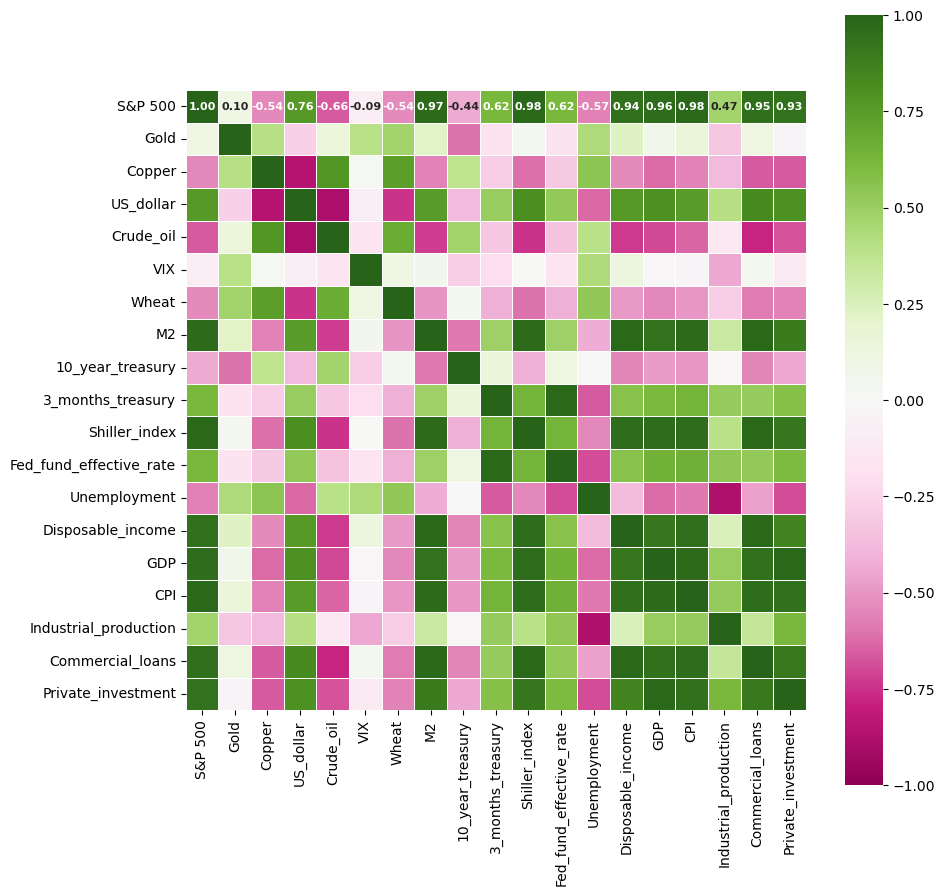

In [15]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'PiYG',
            linewidths = .5, square = True, annot_kws = {'fontsize':8, 'fontweight': 'bold'}, vmin = -1, vmax = 1)